In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '/home/mehdi/github/LSSutils')
from lssutils.stats import nnbar
from lssutils.utils import EbossCat
import pandas as pd
import healpy as hp

In [2]:
p = '/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/'

d = {}
d['noweight'] = np.load(f'{p}nnbar_NGC_noweight_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)
d['NN-known'] = np.load(f'{p}nnbar_NGC_known_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)
d['NN-known+sdss'] = np.load(f'{p}nnbar_NGC_known_mainstar_512_v7_2_main_512.npy', allow_pickle=True)
d['NN-known+gaia'] = np.load(f'{p}nnbar_NGC_known_mainstarg_512_v7_2_main_512.npy', allow_pickle=True)
d['NN-all'] = np.load(f'{p}nnbar_NGC_all_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)
d['standard'] = np.load(f'{p}nnbar_NGC_knownsystot_mainhighz_512_v7_2_main_512.npy', allow_pickle=True)

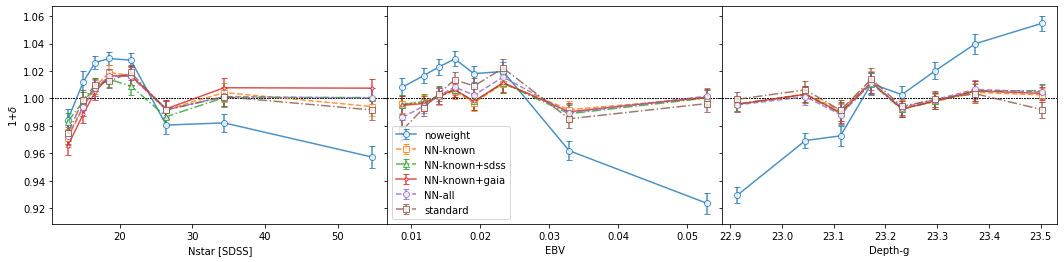

In [3]:
fig, ax = plt.subplots(ncols=3, figsize=(18, 4), sharey=True)
fig.subplots_adjust(wspace=0.0)


ls = 4*['-', '--', '-.']
mk = 4*['o', 's', '^', '.']

for i, (ix,si) in enumerate(zip([0, 1, 7],
                ['Nstar [SDSS]', 'EBV', 'Depth-g'])):
    
    for j, (ni,di) in enumerate(d.items()):        
        
        ax[i].errorbar(di[ix]['bin_avg'], di[ix]['nnbar'], di[ix]['nnbar_err'], 
                      capsize=3, marker=mk[j], mfc='w', ls=ls[j], label=ni, alpha=0.8)
        ax[i].axhline(1.0, ls=':', lw=1, color='k')
    
    ax[i].set_xlabel(f'{si}')
    
ax[1].legend()    


ax[0].set_ylabel(r'1+$\delta$')
fig.savefig('eboss_qso_ngc_main.png', dpi=300, bbox_inches='tight')

In [3]:
from lssutils.extrn.GalacticForegrounds.hpmaps import gaia_dr2

In [4]:
nstar = gaia_dr2(nside_out=512)
nstarg = nstar.gaia

/home/mehdi/github/LSSutils/lssutils/extrn/GalacticForegrounds/hpmaps.py:61: UserWarning: upgrading/downgrading Gaia star density
  warnings.warn('upgrading/downgrading Gaia star density')


In [5]:
def get_ngvsnstar(dat_fn, raw=2):
    dat = EbossCat(dat_fn, kind='data', zmin=0.8, zmax=2.2)
    ran = EbossCat(dat_fn.replace('.dat.', '.ran.'), kind='randoms', zmin=0.8, zmax=2.2)
    
    hpdat = dat.to_hp(512, 0.8, 2.2, raw=raw)
    hpran = ran.to_hp(512, 0.8, 2.2, raw=2)
    mask = (hpran > 0) & (np.isfinite(nstarg)) # & (np.isfinite(nstarg))    
    
    ones = np.ones_like(hpran)
    frac = hpran / (hp.nside2pixarea(512, degrees=True)*5000.)
    
    nbar_1 = nnbar.MeanDensity(hpdat, frac, mask, np.log10(nstarg))
    nbar_1.run()
    return nbar_1.output

In [9]:
p0 = '/home/mehdi/data/eboss/data/v7_2/'
p = '/home/mehdi/data/eboss/data/v7_2/1.0/catalogs/'


d = {}
d['noweight'] = get_ngvsnstar(f'{p0}eBOSS_QSO_full_NGC_v7_2.dat.fits', raw=1)
d['NN-known'] = get_ngvsnstar(f'{p}eBOSS_QSO_full_NGC_known_mainhighz_512_v7_2.dat.fits')
d['NN-known+sdss'] = get_ngvsnstar(f'{p}eBOSS_QSO_full_NGC_known_mainstar_512_v7_2.dat.fits')
d['NN-known+gaia'] = get_ngvsnstar(f'{p}eBOSS_QSO_full_NGC_known_mainstarg_512_v7_2.dat.fits')
d['NN-all'] = get_ngvsnstar(f'{p}eBOSS_QSO_full_NGC_all_mainhighz_512_v7_2.dat.fits')
d['standard'] = get_ngvsnstar(f'{p0}eBOSS_QSO_full_NGC_v7_2.dat.fits')

column QSO_ID not in the randoms file
column IMATCH not in the randoms file
/home/mehdi/miniconda3/envs/py3p6/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file
column QSO_ID not in the randoms file
column IMATCH not in the randoms file


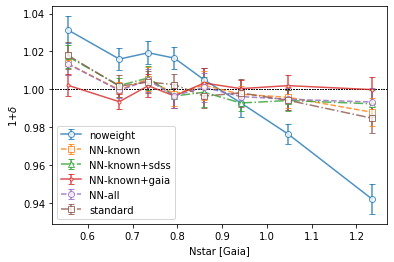

In [12]:
fig, ax = plt.subplots(figsize=(6, 4), sharey=True)
fig.subplots_adjust(wspace=0.0)


ls = 4*['-', '--', '-.']
mk = 4*['o', 's', '^', '.']

si = 'Nstar [Gaia]'

    
for j, (ni,di) in enumerate(d.items()):        

    ax.errorbar(di['bin_avg'], di['nnbar'], di['nnbar_err'], 
                  capsize=3, marker=mk[j], mfc='w', ls=ls[j], label=ni, alpha=0.8)
    ax.axhline(1.0, ls=':', lw=1, color='k')

ax.set_xlabel(f'{si}')
    
ax.legend()    


ax.set_ylabel(r'1+$\delta$')
fig.savefig('eboss_qso_ngc_main_gaia.png', dpi=300, bbox_inches='tight')

In [2]:
import nbodykit.lab as nb

In [6]:
def read(file):
    dt = nb.ConvolvedFFTPower.load(file)
    return (dt.poles['k'], dt.poles['power_0']-0.0*dt.attrs['shotnoise'])

In [7]:
p = '/home/mehdi/data/eboss/data/v7_2/1.0/measurements/spectra/'


d = {}
d['noweight'] = read(f'{p}spectra_NGC_noweight_mainhighz_512_v7_2_main.json')
d['NN-known'] = read(f'{p}spectra_NGC_known_mainhighz_512_v7_2_main.json')
d['NN-known+sdss'] = read(f'{p}spectra_NGC_known_mainstar_512_v7_2_main.json')
d['NN-known+gaia'] = read(f'{p}spectra_NGC_known_mainstarg_512_v7_2_main.json')
d['NN-all'] = read(f'{p}spectra_NGC_all_mainhighz_512_v7_2_main.json')
d['standard'] = read(f'{p}spectra_NGC_knownsystot_mainhighz_512_v7_2_main.json')

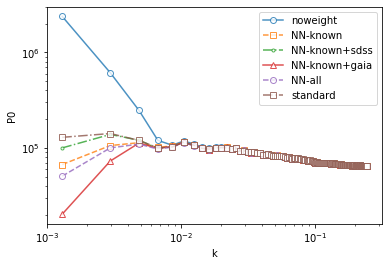

In [8]:
fig, ax = plt.subplots(figsize=(6, 4), sharey=True)
fig.subplots_adjust(wspace=0.0)


ls = 4*['-', '--', '-.']
mk = 4*['o', 's', '.', '^']



    
for j, (ni,di) in enumerate(d.items()):        

    ax.plot(di[0], di[1], marker=mk[j], mfc='w', ls=ls[j], label=ni, alpha=0.8)
    

ax.set(xlabel='k', yscale='log', xscale='log')
    
ax.legend()    


ax.set_ylabel(r'P0')
fig.savefig('eboss_qso_ngc_main_pk.png', dpi=300, bbox_inches='tight')

In [9]:
from lssutils.extrn.GalacticForegrounds.hpmaps import gaia_dr2, NStarSDSS

In [10]:
gaia = gaia_dr2(nside_out=512)
sdss = NStarSDSS(nside_out=512)

/home/mehdi/github/LSSutils/lssutils/extrn/GalacticForegrounds/hpmaps.py:61: UserWarning: upgrading/downgrading Gaia star density
  warnings.warn('upgrading/downgrading Gaia star density')
/home/mehdi/github/LSSutils/lssutils/extrn/GalacticForegrounds/hpmaps.py:29: UserWarning: upgrading/downgrading SDSS star density
  warnings.warn('upgrading/downgrading SDSS star density')


Text(0, 0.5, 'Npix')

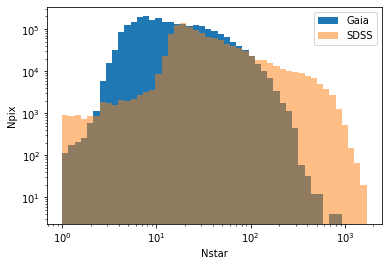

In [36]:
bins = np.logspace(0, np.log10(1700))
_ = plt.hist(gaia.gaia, bins=bins, label='Gaia')
_ = plt.hist(sdss.nstar, alpha=0.5, bins=bins, label='SDSS')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('Nstar')
plt.ylabel('Npix')

In [27]:
import fitsio as ft

In [28]:
dd = ft.read('/home/mehdi/data/eboss/data/v7_2/1.0/NGC/512/main/ngal_eboss_main_512.fits')

Text(0, 0.5, 'Nstar [SDSS]')

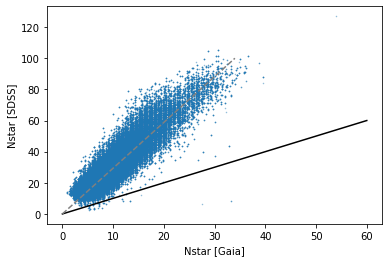

In [37]:
plt.scatter(gaia.gaia[dd['hpix']], sdss.nstar[dd['hpix']], 1, marker='.', alpha=0.5)
plt.plot([0, 60.], [0., 60.], 'k-')
plt.plot([0, 34.], [0., 100.], '--', color='grey')
plt.xlabel('Nstar [Gaia]')
plt.ylabel('Nstar [SDSS]')